# Addition tests

There are some sophisticated/complicated methods of adding vectors in non-Euclidean geometry. In order to test these, I will consider the case of a 1-sphere or 2-sphere.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections, lines, markers, path, patches
%matplotlib inline

In [2]:
from geometry import *
from optimiser import *

## Plain Addition

In [3]:
#Angles:
alpha = 0.1
beta = 1.1
a = np.array([np.cos(alpha), np.sin(alpha)])
b = np.array([np.cos(beta), np.sin(beta)])
wrong = a+b
right = np.array([np.cos(alpha+beta), np.sin(alpha+beta)])
print(a)
print(b)
print(wrong)
print(right)

[0.99500417 0.09983342]
[0.45359612 0.89120736]
[1.44860029 0.99104078]
[0.36235775 0.93203909]


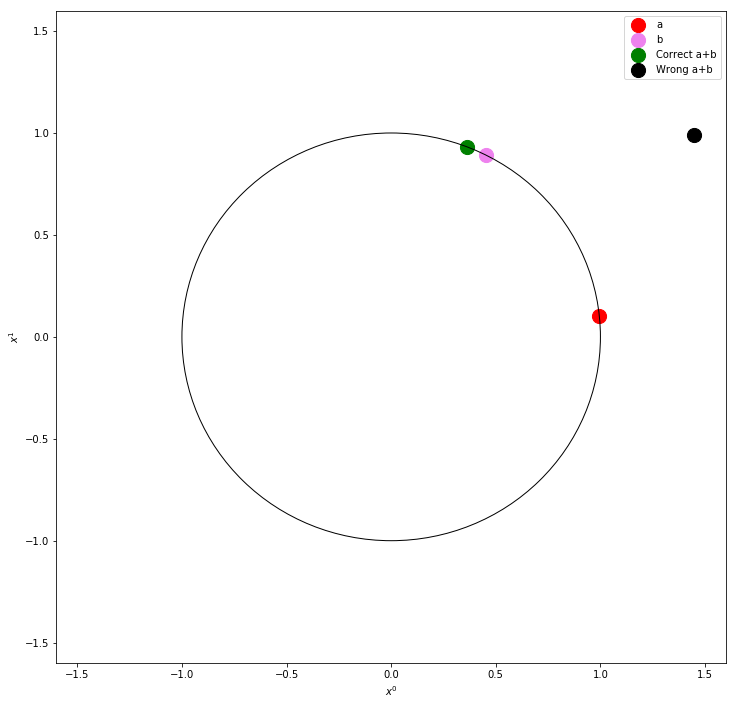

In [4]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.6, 1.6], ylim=[-1.6,1.6], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
ax.add_artist(circle)
ax.scatter(a[0], a[1], color='r', marker='o',s=200,label = "a")
ax.scatter(b[0], b[1], color='violet', marker='o',s=200,label = "b")
ax.scatter(right[0], right[1], color='g', marker='o',s=200,label = "Correct a+b")
ax.scatter(wrong[0], wrong[1], color='k', marker='o',s=200,label = "Wrong a+b")
ax.legend()

## Gyro-vectors

## Einstein midpoints

## Parallel transport

Couldn't one parallel transport the vector to any given space along the 

## Möbius transformations

## Special Relativity

# Mean
Find the mean, which should just yield another vector with the average angle between them. 

In [5]:
#Angles:
mean_wrong = 0.5*(a+b)
mean_angle = 0.5*(alpha+beta)
mean_right = np.array([np.cos(mean_angle), np.sin(mean_angle)])
print(a)
print(b)
print(mean_wrong)
print(mean_right)

[0.99500417 0.09983342]
[0.45359612 0.89120736]
[0.72430014 0.49552039]
[0.82533561 0.56464247]


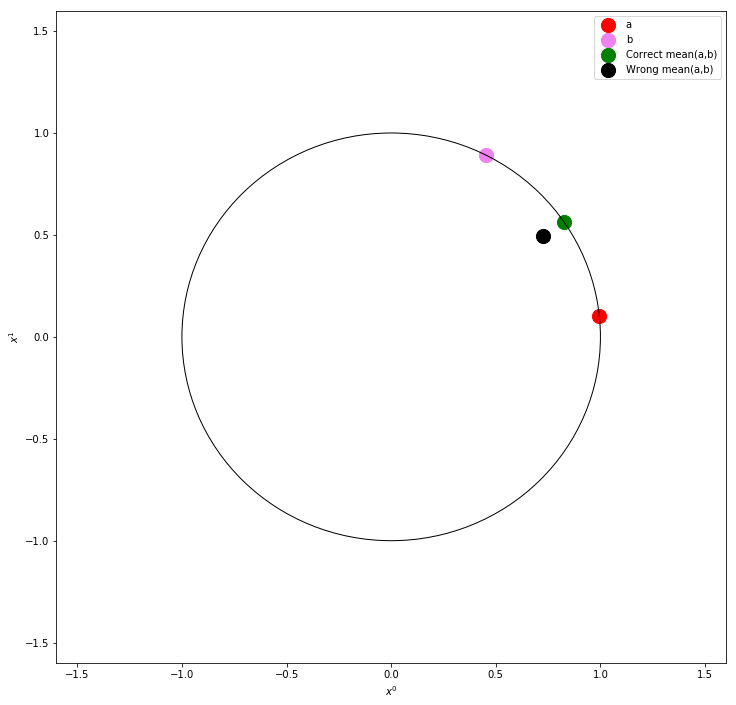

In [6]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.6, 1.6], ylim=[-1.6,1.6], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
ax.add_artist(circle)
ax.scatter(a[0], a[1], color='r', marker='o',s=200,label = "a")
ax.scatter(b[0], b[1], color='violet', marker='o',s=200,label = "b")
ax.scatter(mean_right[0], mean_right[1], color='g', marker='o',s=200,
           label = "Correct mean(a,b)")
ax.scatter(mean_wrong[0], mean_wrong[1], color='k', marker='o',s=200,
           label = "Wrong mean(a,b)")
ax.legend()

## Fréchet mean
Let (M, d) be a complete metric space. Let $x_1, x_2,...,x_n$ be points in $\mathcal{M}$. For any point p in M, the Fréchet variance is $$\Psi(p) = \sum_i^N d^2(p, x_i)$$

The Karcher means are those points, $m$ of $\mathcal{M}$, that locally minimise $\Psi$. $$m = \mathrm{arg\ min}_{p\in\mathcal{M}}\sum_i^N d^2(p, x_i)$$ If there is an $m$ that globally minimises $\Psi$, then it is the Fréchet mean.


In [7]:
from optimiser import *

In [8]:
p_initial = np.array([np.cos(2.5), np.sin(2.5)])
points = [a,b]
frechet_diff(p_initial, points, geometry="spherical")

array([-1.93336295, -1.05216607])

In [9]:
updated_pts = [p_initial]
steps = []
projections = []
#learning_rates = np.arange(1., )
for i in range(1,10):
    updated_pt, step, projection = gradient_descent(
                             updated_pts[i-1], 
                             points, 
                             frechet_diff, 
                             geometry="spherical", 
                             learning_rate=0.32,
                             return_vectors=True,
                        )
    updated_pts.append(updated_pt)
    steps.append(step)
    projections.append(projection)
 #   print("****theta =", np.arctan2(updated_pts[i][0], updated_pts[i][1]))
print(updated_pts)
print(steps)
print(projections)

step = [-1.93336295 -1.05216607]
project_to_tangent: point_on_manifold = [-0.80114362  0.59847214], displacement = [-1.93336295 -1.05216607], geometry = spherical
project_to_tangent: xp_norm = 0.9192093005472568, xx_norm = 0.9999999999999999
projection on tangent space =  [-1.19694429 -1.60228723]
exponential_map: norm_v_tan =  0.6399999999999999
step = [-1.6714982  -1.39527435]
project_to_tangent: point_on_manifold = [-0.28518906  0.95847128], displacement = [-1.6714982  -1.39527435], geometry = spherical
project_to_tangent: xp_norm = -0.8606373998355447, xx_norm = 0.9999999999999999
projection on tangent space =  [-1.91694257 -0.57037812]
exponential_map: norm_v_tan =  0.64
step = [-4.89449168 -7.55549578]
project_to_tangent: point_on_manifold = [0.34364575 0.93909936], displacement = [-4.89449168 -7.55549578], geometry = spherical
project_to_tangent: xp_norm = -8.77733246780343, xx_norm = 1.0
projection on tangent space =  [-1.87819871  0.68729149]
exponential_map: norm_v_tan =  0.6

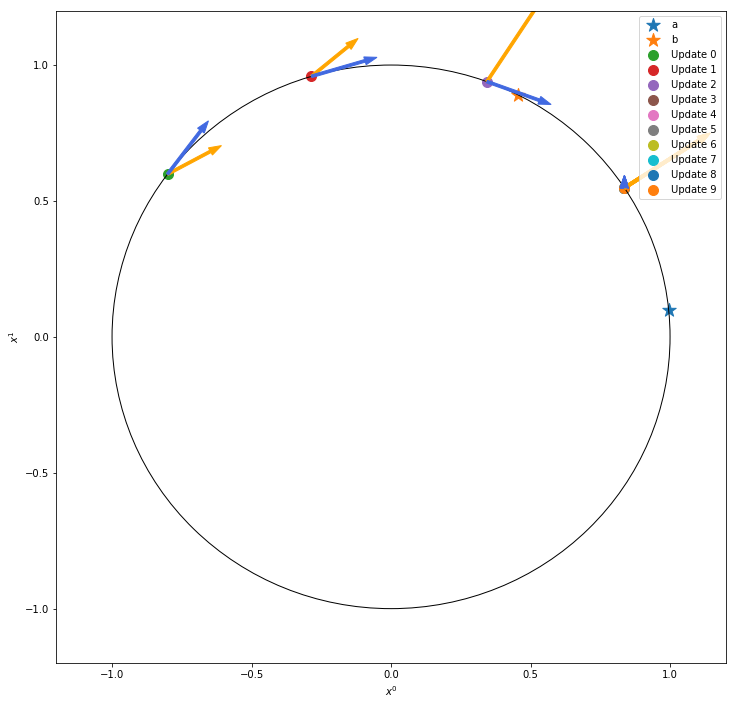

In [10]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.scatter(points[0][0], points[0][1], marker='*',s=200,label = "a")
ax.scatter(points[1][0], points[1][1], marker='*',s=200,label = "b")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
    if i < len(updated_pts)-1:
        ax.arrow(pt[0], pt[1], -0.1*steps[i][0], -0.1*steps[i][1], 
                width=0.01, length_includes_head=True, 
                color="orange", label=r"ambient grad")
        ax.arrow(pt[0], pt[1], -0.1*projections[i][0], -0.1*projections[i][1], 
                width=0.01, length_includes_head=False, 
                color = "royalblue", label=r"tangent-space grad")
ax.legend()

What happens between the two trial points? Does it manage to find optimal solution?

Plot step found as function of angle? Magnitude and sign?

In [39]:
a_theta = np.arccos(a[0])
b_theta = np.arccos(b[0])
theta = np.linspace(-np.pi, np.pi, 1000)
x0 = np.cos(theta)
x1 = np.sin(theta)
x = np.array([np.array([x0i, x1i]) for x0i, x1i in zip(x0, x1)])
#print(x)
print(x.shape)

(1000, 2)


In [40]:
diff = []
for p_eval in x:
    diff.append(np.linalg.norm(frechet_diff(p_eval, points, geometry="spherical")))
diff = np.array(diff).reshape([len(diff), 1])

In [41]:
print(diff.shape)

(1000, 1)


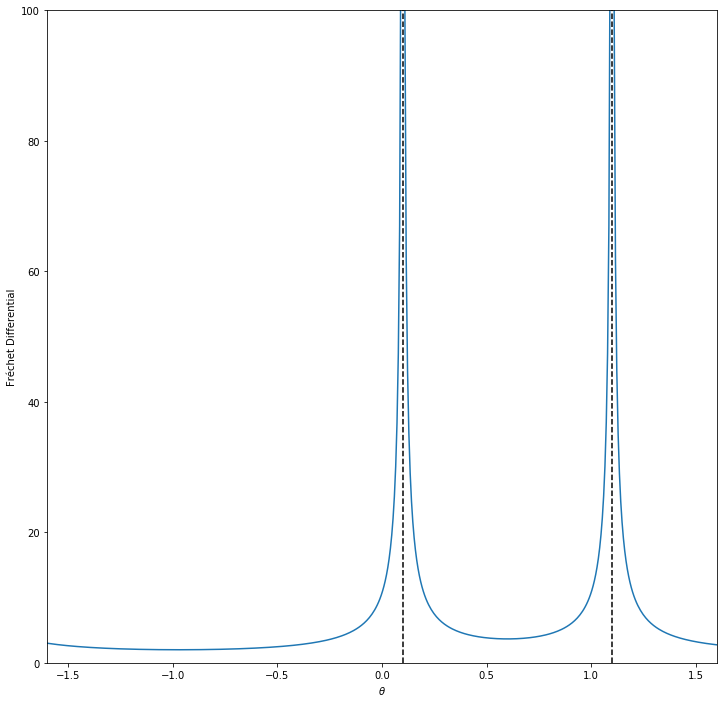

In [48]:
fig = plt.figure(figsize=(12,12))
#ymax = 1.05*np.max(diff)
ymax = 100
ax = plt.gca(xlim=[-1.6, 1.6], ylim=[0, ymax], xlabel=r"$\theta$", ylabel="Fréchet Differential")
ax.axvline(x=a_theta, color='k', linestyle="--")
ax.axvline(x=b_theta, color='k', linestyle="--")
ax.plot(theta, diff)

## Gyro-vectors

## Einstein midpoints

## Parallel transport

Couldn't one parallel transport the vector to any given space along the 

## Möbius transformations